### Dataset

**HDI (Human Development Index)** <br>
Link: https://www.kaggle.com/sudhirnl7/human-development-index-hdi

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
df_hdi = pd.read_csv('datasets/HDI.csv', index_col=0)

In [3]:
df_hdi.tail()

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
190,191,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,192,Nauru,NaN,NaN,NaN,NaN,12058.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193,San Marino,NaN,NaN,NaN,NaN,50063.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,194,Somalia,NaN,NaN,55.7,NaN,294.0,NaN,NaN,NaN,...,NaN,42.1,0.318,43.5,NaN,NaN,NaN,NaN,NaN,NaN
194,195,Tuvalu,NaN,NaN,NaN,NaN,5395.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.5,NaN,NaN,NaN,7.7,1.9,41.1


In [4]:
df_hdi = df_hdi.fillna(0)

In [5]:
df_hdi.tail()

,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,Average annual HDI growth 1990-2000,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
190,191,Monaco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,192,Nauru,0.0,0.0,0.0,0.0,12058.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,193,San Marino,0.0,0.0,0.0,0.0,50063.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,194,Somalia,0.0,0.0,55.7,0.0,294.0,0.0,0.0,0.0,...,0.0,42.1,0.318,43.5,0.0,0.0,0.0,0.0,0.0,0.0
194,195,Tuvalu,0.0,0.0,0.0,0.0,5395.0,0.0,0.0,0.0,...,0.0,0.0,0.000,10.5,0.0,0.0,0.0,7.7,1.9,41.1


In [6]:
df_hdi = df_hdi[df_hdi['HDI'] != 0]

In [7]:
df_hdi.shape

(188, 81)

HDI is ranked on a scale from 0 to 1.0, with 1.0 being the highest human development. 
HDI is broken down into four tiers:

- very high human development (0.8-1.0)
- high human development (0.7-0.79)
- medium human development (0.55-.70)
- and low human development (below 0.55)

In [8]:
df_hdi.insert(0, 'HDI_class', None)

In [9]:
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask(df_hdi['HDI'] > 0.8 , 1)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask((df_hdi['HDI'] > 0.7) & (df_hdi['HDI'] <= 0.8) , 2)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask((df_hdi['HDI'] > 0.55) & (df_hdi['HDI'] <= 0.7) , 3)
df_hdi['HDI_class'] = df_hdi['HDI_class'].mask(df_hdi['HDI'] <= 0.55, 4)

In [10]:
df_hdi.sample(5)

,HDI_class,Id,Country,HDI Rank,HDI,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Change in HDI rank 2010-2015,...,Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015
137,3,138,Lao People's Democratic Republic,138.0,0.586,66.6,5.2,5049.0,-2.0,5.0,...,26.9,26.2,0.529,34.1,0.313,20.3,0.472,6.3,1.7,37.9
147,4,148,Swaziland,148.0,0.541,48.9,6.8,7522.0,-33.0,-1.0,...,33.1,35.0,0.289,26.8,0.399,37.6,0.408,14.2,3.5,51.5
13,1,14,Sweden,14.0,0.913,82.3,12.3,46251.0,2.0,-1.0,...,6.6,3.3,0.928,3.4,0.826,13.1,0.806,4.2,0.9,27.3
27,1,28,Czech Republic,28.0,0.878,78.8,12.3,28144.0,11.0,0.0,...,5.3,3.5,0.873,1.4,0.866,11.1,0.757,3.8,0.9,26.1
182,4,183,Guinea,183.0,0.414,59.2,2.6,1058.0,4.0,0.0,...,33.6,35.4,0.390,48.3,0.171,17.1,0.296,5.5,1.3,33.7


In [11]:
#df_hdi.columns

In [12]:
training_columns = df_hdi.columns[5:]

In [13]:
#training_columns

In [14]:
y_labels = df_hdi['HDI_class'].astype(int)

In [15]:
X = df_hdi[training_columns].values.astype(float)

### Execução

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [17]:
classifiers = [
    {'name': 'DecisionTreeClassifier', 'classifier': DecisionTreeClassifier()},
    {'name': 'MLPClassifier', 'classifier': MLPClassifier()},
    {'name': 'GaussianNB', 'classifier': GaussianNB()},
    {'name': 'RandomForestClassifier', 'classifier': RandomForestClassifier()}
]

Modelo de classificação

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.25, random_state=42)

In [19]:
classifier_f1_score_data = np.array([])

best_f1_score = 0.0 
best_clf = None

for classifier in classifiers:
    
    clf = classifier['classifier'].fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred,output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    
    if(best_f1_score < f1_score):
        best_f1_score = f1_score
        best_clf = clf
        
    line = [
        classifier['name'], f1_score
    ]
    
    classifier_f1_score_data = np.concatenate(
        (classifier_f1_score_data, line)
    )

In [20]:
#classifier_f1_score_data
classifier_f1_score_data = classifier_f1_score_data.reshape(4,2)

In [21]:
classifier_f1_score_data

array([['DecisionTreeClassifier', '0.7956500201347094'],
       ['MLPClassifier', '0.17345148666276822'],
       ['GaussianNB', '0.8265654406839134'],
       ['RandomForestClassifier', '0.8265654406839134']], dtype='<U32')

In [22]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

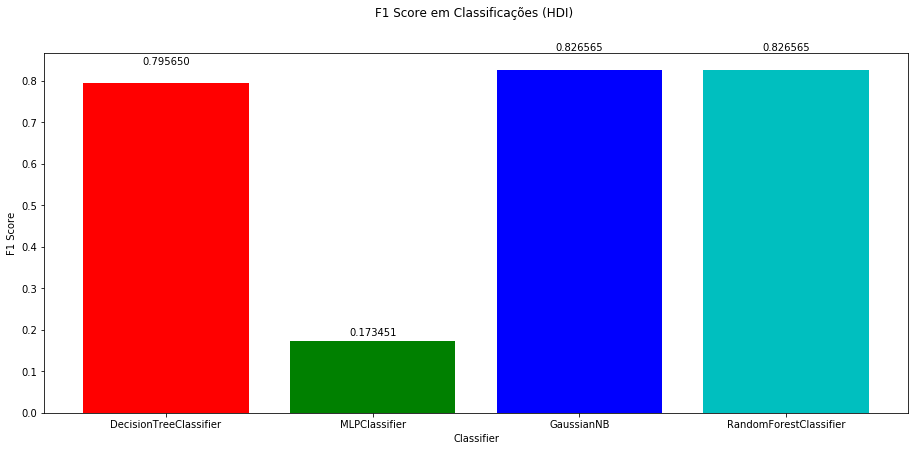

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('F1 Score em Classificações (HDI) \n\n')

rects = ax.bar(
        classifier_f1_score_data[:,0], 
        classifier_f1_score_data[:,1].astype(float), color='rgbc'
    )

plt.ylabel('F1 Score')
plt.xlabel('Classifier')

autolabel(rects)

plt.show()

In [24]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = X
K = len(np.unique(y_labels)) + 1

kfold = KFold(K, True)

print('Best Classifier: ' + str(best_clf))
print('Cross-validation Score:')
print(cross_val_score(best_clf, X, y_labels, cv=kfold))

Best Classifier: GaussianNB()
Cross-validation Score:
[0.89473684 0.86842105 0.68421053 0.83783784 0.86486486]
